In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
# dataset 可以線性分割

# url = './data/train.csv'
# train = np.genfromtxt(url, dtype=None, skip_header=1, delimiter=',')
train = pd.read_csv('train.csv')
# print(train)
test = pd.read_csv('test.csv')
# print(test)

In [12]:
# Sex: male = 0, female = 1
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

# --- Nan->np.mean() ---
# Age(NaN)
train["Age"] = train["Age"].fillna(test["Age"].mean())
test["Age"] = test["Age"].fillna(test["Age"].mean())

# Fare(NaN)
train["Fare"] = train["Fare"].fillna(train["Fare"].mean())
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())

# Embark: s=0, c=1, q=2
train["Embarked"] = train["Embarked"].fillna("S")
test["Embarked"] = train["Embarked"].fillna("S")

train.loc[train["Embarked"] == "S", "Embarked"] = -1
train.loc[train["Embarked"] == "C", "Embarked"] = 0
train.loc[train["Embarked"] == "Q", "Embarked"] = 1

test.loc[test["Embarked"] == "S", "Embarked"] = -1
test.loc[test["Embarked"] == "C", "Embarked"] = 0
test.loc[test["Embarked"] == "Q", "Embarked"] = 1

# Survived? in train
train.loc[train["Survived"] == 0, "Survived"] = -1
train = np.array(train.values)
test = np.array(test.values)

# Pclass, sex, age, fare, embark
dataset = np.zeros((891, 6))
dataset[:, 0] = train[:, 2]   # x0 = Pclass
dataset[:, 1] = train[:, 4]   # x1 = Sex
dataset[:, 2] = train[:, 5]   # x2 = Age
dataset[:, 3] = train[:, 9]   # x3 = Fare
dataset[:, 4] = train[:, 11]  # x4 = Embark
dataset[:, 5] = train[:, 1]   # x5 = survived

In [13]:
# 判斷有沒有分類錯誤
def check_error(w, dataset):
    for j in range(0, 5000):
        for i in range(0, len(dataset)):
            x = dataset[i, :]
            y = w.T.dot(x)  # @ = dot
            if np.sign(y) == (dataset[i, 5]):
                continue
            else:
                w = w + x*(dataset[i, 5])
                break
    return w

# PLA演演算法實作
def pla(dataset):
    w = np.zeros(6)
    return check_error(w, dataset)


# 執行
w = pla(dataset)

<AxesSubplot:ylabel='count'>

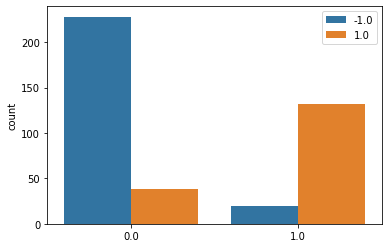

In [14]:
####################################################
# test
test_dataset = np.zeros((418, 6))
test_dataset[:, 0] = test[:, 1]  # Pclass
test_dataset[:, 1] = test[:, 3]  # Sex
test_dataset[:, 2] = test[:, 4]  # Age
test_dataset[:, 3] = test[:, 8]  # Fare
test_dataset[:, 4] = test[:, 10]  # Embarked


def test_PLA(data):
    for i in range(0, len(data)):
        x = data[i, :]
        data[i, 5] = np.sign(w.T.dot(x))


# 執行
test_PLA(test_dataset)
sns.countplot(test_dataset[:, 1], hue=test_dataset[:, 5])


<AxesSubplot:ylabel='count'>

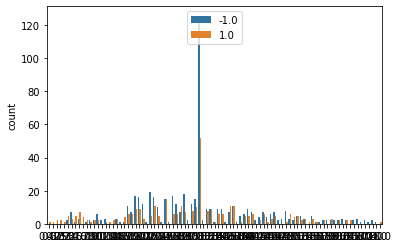

In [15]:
sns.countplot(dataset[:, 2], hue=dataset[:, 5])

<AxesSubplot:ylabel='count'>

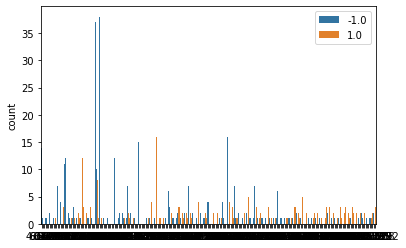

In [16]:
sns.countplot(dataset[:, 3], hue=dataset[:, 5])

<AxesSubplot:ylabel='count'>

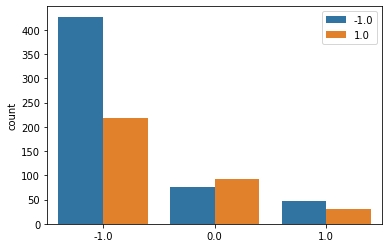

In [17]:
sns.countplot(dataset[:, 4], hue=dataset[:, 5])